In [1]:
#importing required packages

import uproot
import matplotlib.pyplot as plt
import pandas as pd
# import numpy as np
import sys
from multiprocessing import Process
from skhep.math.vectors import LorentzVector, Vector3D

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

from IPython.display import display, Latex

# the package of my own defined functions
# with importing you gotta import every module that you used in your function in your functions file like numpy
# from functions import *

%matplotlib inline

In [2]:
# Note that when the format is ipynb then importing doesn't work, I don't know why. So this is the alternative way

# execfile('file.py') in Python 2
exec(open('functions.py').read()) #in Python 3

b


## Cuts

In [3]:
AND=" and ";   OR=" or ";   NOT=" not ";   cand0=" (__candidate__==0) ";   mycand=" (__candidate__==myBest) "
BpBmcut="( decayModeID==3005530 )";        B0B0cut="( decayModeID>=3005531 and decayModeID<=3005534 )"
roecuts="( nROE_Ch==0 and Eextra_ROE<1 )"
y4scuts="( cosBY0<1.1 and cosBY0>-1.9 and cosBY1<1.1 and cosBY1>-1.9 and (B0_decayModeID<500 or B1_decayModeID<500) )"
y4scuts_new = "( cosBY0<1.3 and cosBY0>-3.2 and cosBY1<1.1 and cosBY1>-1.9 )"
pipcut0="( (abs(pi4_B0_InvM-0.1395)<0.001 and pi4_1_B0_PDG!=22)"
pipcut1="( (abs(pi4_B1_InvM-0.1395)<0.001 and pi4_1_B1_PDG!=22)"
pipcut = '('+pipcut0 +OR+ pipcut1+')'
piptrue= '(('+pipcut0+AND+'(pi4_B0_isSignal==1))' +OR+ '('+pipcut1+AND+'(pi4_B1_isSignal==1))'+')'
pi0cut0="(abs(pi4_B0_InvM-0.135)<0.025 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
pi0cut1="(abs(pi4_B1_InvM-0.135)<0.025 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
pi0cut = '('+pi0cut0 +OR+ pi0cut1+')'
pi0wide0="(abs(pi4_B0_InvM-0.135)<0.050 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
pi0wide1="(abs(pi4_B1_InvM-0.135)<0.050 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
pi0wide = '('+pi0wide0 +OR+ pi0wide1+')'
pi0true0= '('+pi0wide0 +AND+ '(pi4_B0_isSignal==1)'+')'
pi0true1= '('+pi0wide1 +AND+ '(pi4_B1_isSignal==1)'+')'
pi0true = '('+pi0true0 +OR+ pi0true1+')'
pi0cutE0= '('+pi0cut0 +AND+ '(pi4_B0_ECM>0.35)'+')'
pi0cutE1= '('+pi0cut1 +AND+ '(pi4_B1_ECM>0.35)'+')'
pi0cutE = '('+pi0cutE0 +OR+ pi0cutE1+')'
pi0wideE0= '('+pi0wide0 +AND+ '(pi4_B0_ECM>0.35)'+')'
pi0wideE1= '('+pi0wide1 +AND+ '(pi4_B1_ECM>0.35)'+')'
pi0wideE = '('+pi0wideE0 +OR+ pi0wideE1+')'
pi0trueE0= '('+pi0true0 +AND+ '(pi4_B0_ECM>0.35)'+')'
pi0trueE1= '('+pi0true1 +AND+ '(pi4_B1_ECM>0.35)'+')'
pi0trueE = '('+pi0trueE0 +OR+ pi0trueE1+')'
etacut0 ="(abs(pi4_B0_InvM-0.547)<0.055 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
etacut1 ="(abs(pi4_B1_InvM-0.547)<0.055 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
etacut  = '('+etacut0 +OR+ etacut1+')'
etawide0="(abs(pi4_B0_InvM-0.547)<0.120 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
etawide1="(abs(pi4_B1_InvM-0.547)<0.120 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
etawide = '('+etawide0 +OR+ etawide1+')'
etatrue0= '('+etawide0 +AND+ '(pi4_B0_isSignal==1)'+')'
etatrue1= '('+etawide1 +AND+ '(pi4_B1_isSignal==1)'+')'
etatrue = '('+etatrue0 +OR+ etatrue1+')'

Bprec_eta = "((abs(B0_decayModeID-250)<160 and abs(B1_decayModeID-1650)<60) or (abs(B1_decayModeID-250)<160 and abs(B0_decayModeID-1650)<60))"
B0rec_eta = "((abs(B0_decayModeID-250)<160 and abs(B1_decayModeID-1450)<60) or (abs(B1_decayModeID-250)<160 and abs(B0_decayModeID-1450)<60))"

# format of labels
# label including this form2 will have these properties
form_title = {'family': 'helvetica', 'color': 'black', 'size': 15}
form_label = {'family': 'helvetica', 'color': 'black', 'size': 20}


mcNBB = 180000 * 2. *199;   mclumi = mcNBB / 1100000.
print(f'Number of BB events (sum of B+B- and B0B0) = {mcNBB:6.3e}')
print(f'MC sample equivalent to {mclumi:.2f} fb-1')

Number of BB events (sum of B+B- and B0B0) = 7.164e+07
MC sample equivalent to 65.13 fb-1


$ $
$ $

using all cpus, it's not working now

In [ ]:
def task():
    file_charged = uproot.open("DlDl_charged_gbasf2.root:Y4S")
    df_charged = pd.DataFrame()
    for batch in file_charged.iterate(step_size="100 MB", library='pd'):
        df_charged = df_charged.append(batch.query(BpBmcut+AND+roecuts+AND+Bprec_eta))
    df_charged

In [ ]:
process = Process(target=task)

In [ ]:
process.start()

In [ ]:
with process.pool(process.cpu_counts()) as pool:
    pool.map(function, list(row))

## Data loading

In [ ]:
# data frame for Abid
df_ch = pd.DataFrame()
for batch in file_charged.iterate(step_size="100 MB", library='pd'):
    df_ch = df_ch.append(batch.query(BpBmcut+AND+roecuts))
df_ch

In [ ]:
df_mix = pd.DataFrame()
for batch in file_mixed.iterate(step_size='100 MB', library='pd'):
    df_mix = df_mix.append(batch.query(B0B0cut+AND+roecuts))
df_mix

In [ ]:
frame = [df_ch, df_mix]
tree = pd.concat(frame, keys=['charged', 'mixed'])
tree

In [ ]:
tree.to_csv('semileptonic_Bdecay_data.csv', index=False)

In [ ]:
%%time
tree.to_pickle('semileptonic_Bdecay_data.pkl')

In [ ]:
%%time
t_pkl = pd.read_pickle('semileptonic_Bdecay_data.pkl')
t_pkl

In [ ]:
t_pkl.loc['mixed']

### Cherged B mesons

In [4]:
# opening the gbasf2 charged root file
file_charged = uproot.open("DlDl_charged_gbasf2.root:Y4S")

In [5]:
%%time
# removing some of the entries, keep charged B mesons + no charged particles in ROE + 
# Bs reconstructed as Dlnu and Detalnu
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.max_columns', 868)

df_charged = pd.DataFrame()
for batch in file_charged.iterate(step_size="100 MB", library='pd'):
    df_charged = df_charged.append(batch.query(BpBmcut+AND+roecuts+AND+Bprec_eta))
df_charged

/Users/sahargholipour/opt/anaconda3/lib/python3.9/site-packages/uproot/interpretation/library.py:805: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]


CPU times: user 5min 10s, sys: 30.4 s, total: 5min 41s
Wall time: 6min 10s


,__experiment__,__run__,__event__,__production__,__candidate__,__ncandidates__,__weight__,Ecms,aBminusMode,aBplusMode,...,MCGenPDG_45,MCGenMothIndex_45,MCGenPDG_46,MCGenMothIndex_46,MCGenPDG_47,MCGenMothIndex_47,MCGenPDG_48,MCGenMothIndex_48,MCGenPDG_49,MCGenMothIndex_49
21,1003,0,12624622,24816,0,5,1.0,10.579557,-1024.0,1001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,1003,0,12624622,24816,2,5,1.0,10.579557,-1024.0,1001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,1003,0,12125220,24816,0,9,1.0,10.579557,-1021.0,1001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,1003,0,12125220,24816,1,9,1.0,10.579557,-1021.0,1001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,1003,0,12125220,24816,2,9,1.0,10.579557,-1021.0,1001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793481,1003,0,36952707,24820,4,6,1.0,10.579557,-3.0,1021.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793482,1003,0,36952707,24820,5,6,1.0,10.579557,-3.0,1021.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793501,1003,0,37329964,24820,0,8,1.0,10.579557,-1002.0,1001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793502,1003,0,37329964,24820,1,8,1.0,10.579557,-1002.0,1001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Mixed B mesons

In [6]:
file_mixed = uproot.open("DlDl_mixed_gbasf2.root:Y4S")

In [7]:
%%time
# removing some of the entries, keep mixed B mesons + no charged particles in ROE + 
# Bs reconstructed as Dlnu and Detalnu
df_mixed = pd.DataFrame()
for batch in file_mixed.iterate(step_size="100 MB", library='pd'):
    df_mixed = df_mixed.append(batch.query(B0B0cut+AND+roecuts+AND+B0rec_eta))
df_mixed

/Users/sahargholipour/opt/anaconda3/lib/python3.9/site-packages/uproot/interpretation/library.py:805: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]


CPU times: user 2min 44s, sys: 18.8 s, total: 3min 3s
Wall time: 3min 21s


,__experiment__,__run__,__event__,__production__,__candidate__,__ncandidates__,__weight__,Ecms,aBminusMode,aBplusMode,...,MCGenPDG_45,MCGenMothIndex_45,MCGenPDG_46,MCGenMothIndex_46,MCGenPDG_47,MCGenMothIndex_47,MCGenPDG_48,MCGenMothIndex_48,MCGenPDG_49,MCGenMothIndex_49
130,1003,0,17159205,24821,0,4,1.0,10.579557,-99.0,-99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
422,1003,0,29164953,24821,1,3,1.0,10.579557,-99.0,-99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423,1003,0,29164953,24821,2,3,1.0,10.579557,-99.0,-99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,1003,0,30101577,24821,0,6,1.0,10.579557,-99.0,-99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
922,1003,0,22628423,24821,0,3,1.0,10.579557,-99.0,-99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430606,1003,0,72016,25056,1,9,1.0,10.579557,-99.0,-99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
430795,1003,0,878715,25056,0,6,1.0,10.579557,-99.0,-99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
430798,1003,0,878715,25056,3,6,1.0,10.579557,-99.0,-99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
430837,1003,0,657322,25056,0,3,1.0,10.579557,-99.0,-99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Combining two data frames
frames = [df_charged, df_mixed]
Tree = pd.concat(frames, keys=['charged', 'mixed'])
Tree

__experiment__  __run__  __event__  __production__  \
charged 21                1003        0   12624622           24816   
        23                1003        0   12624622           24816   
        119               1003        0   12125220           24816   
        120               1003        0   12125220           24816   
        121               1003        0   12125220           24816   
...                        ...      ...        ...             ...   
mixed   430606            1003        0      72016           25056   
        430795            1003        0     878715           25056   
        430798            1003        0     878715           25056   
        430837            1003        0     657322           25056   
        430838            1003        0     657322           25056   

                __candidate__  __ncandidates__  __weight__       Ecms  \
charged 21                  0                5         1.0  10.579557   
        23                  2                5         1.0  10.579557   
        119                 0                9         1.0  10.579557   
        120                 1                9         1.0  10.579557   
        121                 2                9         1.0  10.579557   
...                       ...              ...         ...        ...   
mixed   430606              1                9         1.0  10.579557   
        430795              0                6         1.0  10.579557   
        430798              3                6         1.0  10.579557   
        430837              0                3         1.0  10.579557   
        430838              1                3         1.0  10.579557   

                aBminusMode  aBplusMode  ...  MCGenPDG_45  MCGenMothIndex_45  \
charged 21          -1024.0      1001.0  ...          NaN                NaN   
        23          -1024.0      1001.0  ...          NaN                NaN   
        119         -1021.0      1001.0  ...          NaN                NaN   
        120         -1021.0      1001.0  ...          NaN                NaN   
        121         -1021.0      1001.0  ...          NaN                NaN   
...                     ...         ...  ...          ...                ...   
mixed   430606        -99.0       -99.0  ...          NaN                NaN   
        430795        -99.0       -99.0  ...          NaN                NaN   
        430798        -99.0       -99.0  ...          NaN                NaN   
        430837        -99.0       -99.0  ...          NaN                NaN   
        430838        -99.0       -99.0  ...          NaN                NaN   

                MCGenPDG_46  MCGenMothIndex_46  MCGenPDG_47  \
charged 21              NaN                NaN          NaN   
        23              NaN                NaN          NaN   
        119             NaN                NaN          NaN   
        120             NaN                NaN          NaN   
        121             NaN                NaN          NaN   
...                     ...                ...          ...   
mixed   430606          NaN                NaN          NaN   
        430795          NaN                NaN          NaN   
        430798          NaN                NaN          NaN   
        430837          NaN                NaN          NaN   
        430838          NaN                NaN          NaN   

                MCGenMothIndex_47  MCGenPDG_48  MCGenMothIndex_48  \
charged 21                    NaN          NaN                NaN   
        23                    NaN          NaN                NaN   
        119                   NaN          NaN                NaN   
        120                   NaN          NaN                NaN   
        121                   NaN          NaN                NaN   
...                           ...          ...                ...   
mixed   430606                NaN          NaN                NaN   
        430795              

In [9]:
df_mixed['decayModeID'].value_counts()

3005531.0    2456
3005533.0     694
3005532.0     599
3005534.0     239
Name: decayModeID, dtype: int64

In [10]:
#Note: be careful this list of eta modes doesn't have some of the modes like 301019
etamodesBp = list((1019,1020,1039,1040,101019,101020,101039,101040,201019,201020,201039,201040))
etamodesBm = [-x for x in etamodesBp]
etamodesBpBm = etamodesBp + etamodesBm

etamodesB0 = list((1017,1018,1035,1036,101017,101018,101035,101036,201017,201018,201035,201036))
etamodesB0bar = [-x for x in etamodesB0]
etamodesB0B0 = etamodesB0 + etamodesB0bar

print(f'{-101019 in etamodesBpBm}  {1002 in etamodesB0B0}')
geneta=f'( (aBminusMode in {etamodesBpBm}) | (aBplusMode in {etamodesBpBm}) )'

True  False


# Analysis

In [13]:
# explanation for each cut

textstr = r'For all cuts one of Bs reconstructed as $D^{(*)}l\nu$  and the other one as $D^{(*)}\eta l\nu$' + '\n, no charged particles in ROE'
textstr0 = r'Only candidate0 which is the best candidate is included'
textstr1 = 'Best candidate \n, and the fourth particle in B decay should have invariant mass of eta \n, and should decay to a pair of $\gamma$'
textstr2 = 'Best candidate \n, and cosBY<1.1 and cosBY>-1.9'
textstr3 = 'Best candidate \n, and new range for cosBY'
textstr4 = 'Mix of cuts one and two'
text = [textstr0, textstr1, textstr2, textstr3, textstr4]

$B^+B^-$

In [45]:
#trying to show what isSignal mean to me:
#It means one of the Bs should decay to Dlnu and the other one Detalnu

# sample B plus meaning I chose for one of them only Dlnu then the other one to be D(*)0etalnu,
# so one of the Bs is charged based on what I checked the other one is also charged so like Dlnu in [300, 400]
# add this cut later: samplesBp1 = aTree.query(mycand+AND+BpBmcut+AND+Bprec_eta)

samplesBp0 = Tree.loc['charged']
samplesBp1 = Tree.loc['charged'].query(cand0)
samplesBp2 = Tree.loc['charged'].query(cand0+AND+etacut)
samplesBp3 = Tree.loc['charged'].query(cand0+AND+y4scuts)
# samplesBp3 = Tree.loc['charged'].query(cand0+AND+y4scuts_new)
samplesBp4 = Tree.loc['charged'].query(cand0+AND+y4scuts+AND+etacut)
samplesBp_cuts = [samplesBp0, samplesBp1, samplesBp2, samplesBp3, samplesBp4]

In [46]:
tree_p = sig_bkg_counter('charged',samplesBp_cuts)

       length  total_sigbkg  n_signal   n_background   significance     efficiency         p         peaking_bkg
my 
isSignal
--------------------------------------------------------------------------------------------------------------------
cut0: 21990      21990         2069        19921         13.95            1.0000        0.007035        767
--------------------------------------------------------------------------------------------------------------------
cut1:  3896       3896          480         3416          7.69            0.2320        0.003903        175
--------------------------------------------------------------------------------------------------------------------
cut2:  3803       3803          479         3324          7.77            0.2315        0.003947        174
--------------------------------------------------------------------------------------------------------------------
cut3:  2441       2441          392         2049          7.93            0.1895  

In [47]:
tree_p

__experiment__  __run__   __event__  __production__  \
cut0 signal              1003.0      0.0  11916538.0         24816.0   
     signal              1003.0      0.0  11916538.0         24816.0   
     signal              1003.0      0.0  11916538.0         24816.0   
     signal              1003.0      0.0  27178608.0         24816.0   
     signal              1003.0      0.0  27178608.0         24816.0   
...                         ...      ...         ...             ...   
cut4 background          1003.0      0.0  80376579.0         24820.0   
     background          1003.0      0.0  74601352.0         24820.0   
     background          1003.0      0.0  84372463.0         24820.0   
     background          1003.0      0.0  89998821.0         24820.0   
     background          1003.0      0.0  44658980.0         24820.0   

                 __candidate__  __ncandidates__  __weight__       Ecms  \
cut0 signal                0.0              9.0         1.0  10.579557   
     signal                2.0              9.0         1.0  10.579557   
     signal                4.0              9.0         1.0  10.579557   
     signal                4.0              9.0         1.0  10.579557   
     signal                8.0              9.0         1.0  10.579557   
...                        ...              ...         ...        ...   
cut4 background            0.0              9.0         1.0  10.579557   
     background            0.0              9.0         1.0  10.579557   
     background            0.0              9.0         1.0  10.579557   
     background            0.0              2.0         1.0  10.579557   
     background            0.0              4.0         1.0  10.579557   

                 aBminusMode  aBplusMode  aB0Mode  aBbar0Mode  aDstminusMode  \
cut0 signal          -1001.0      1020.0    -99.0       -99.0          -99.0   
     signal          -1001.0      1020.0    -99.0       -99.0          -99.0   
     signal          -1001.0      1020.0    -99.0       -99.0          -99.0   
     signal        -101003.0    101020.0    -99.0       -99.0          -99.0   
     signal        -101003.0    101020.0    -99.0       -99.0          -99.0   
...                      ...         ...      ...         ...            ...   
cut4 background    -101001.0      1021.0    -99.0       -99.0          -99.0   
     background      -1021.0      1001.0    -99.0       -99.0          -99.0   
     background    -201001.0      1021.0    -99.0       -99.0          -99.0   
     background      -1001.0      1026.0    -99.0       -99.0          -99.0   
     background    -201002.0      1002.0    -99.0       -99.0          -99.0   

                 aDstplusMode  aDminusMode  aDplusMode  aD0Mode  aDbar0Mode  \
cut0 signal             -99.0        -99.0       -99.0   1036.0     -1034.0   
     signal             -99.0        -99.0       -99.0   1036.0     -1034.0   
     signal             -99.0        -99.0       -99.0   1036.0     -1034.0   
     signal             -99.0        -99.0       -99.0   1046.0   -101002.0   
     signal             -99.0        -99.0       -99.0   1046.0   -101002.0   
...                       ...          ...         ...      ...         ...   
cut4 background         -99.0        -99.0       -99.0   1017.0     -1050.0   
     background         -99.0        -99.0       -99.0   1046.0     -1017.0   
     background         -99.0        -99.0       -99.0   1036.0   -101017.0   
     background         -99.0        -99.0       -99.0   1034.0     -1017.0   
     background         -99.0        -99.0       -99.0   1054.0     -1036.0   

                      ECM       pCM      InvM   cosThCM     phiCM       PDG  \
cut0 signal      9.015744  1.603376  8.869189 -0.881740 -0.771665  300553.0   
     signal      8.885485  1.554865  8.745610 -0.832845 -0.928906  300553.0   
     signal      8.864023  1.642035  8.709985 -0.880447 -0.847113  300553.0   
     signal      8.023907  2.037985  

In [ ]:
tree_p.loc['cut0'].loc['background']

$B^0\bar{B0}$

In [51]:
Tree.loc['mixed']['__candidate__'].value_counts()

0    1070
1     769
2     534
3     417
4     331
5     278
6     231
7     187
8     171
Name: __candidate__, dtype: int64

In [58]:
#trying to show what isSignal mean to me:
#It means one of the Bs should decay to Dlnu and the other one Detalnu

# sample B zero meaning I chose for one of them only D(*)lnu then the other one to be D(*)-etalnu,
# so one of the Bs is charged based on what I checked the other one is also charged so like Dlnu in [100, 200]

samplesBz0 = Tree.loc['mixed']
samplesBz1 = Tree.loc['mixed'].query(cand0)
samplesBz2 = Tree.loc['mixed'].query(cand0+AND+etacut)
samplesBz3 = Tree.loc['mixed'].query(cand0+AND+y4scuts)
# samplesBz3 = Tree.loc['mixed'].query(cand0+AND+y4scuts_new)
samplesBz4 = Tree.loc['mixed'].query(cand0+AND+y4scuts+AND+etacut)
samplesBz_cuts = [samplesBz0, samplesBz1, samplesBz2, samplesBz3, samplesBz4]

In [59]:
tree0 = sig_bkg_counter('mixed',samplesBz_cuts)

       length  total_sigbkg  n_signal   n_background   significance     efficiency         p         peaking_bkg
my 
isSignal
--------------------------------------------------------------------------------------------------------------------
cut0:  3988       3988          691         3297         10.94            1.0000        0.017118        188
--------------------------------------------------------------------------------------------------------------------
cut1:  1070       1070          184          886          5.63            0.2663        0.008655         66
--------------------------------------------------------------------------------------------------------------------
cut2:  1032       1032          181          851          5.63            0.2619        0.008682         65
--------------------------------------------------------------------------------------------------------------------
cut3:   706        706          157          549          5.91            0.2272  

In [50]:
tree0

__experiment__  __run__   __event__  __production__  \
cut0 signal              1003.0      0.0  25578865.0         24821.0   
     signal              1003.0      0.0  26972848.0         24821.0   
     signal              1003.0      0.0  19000972.0         24821.0   
     signal              1003.0      0.0  28863525.0         24821.0   
     signal              1003.0      0.0  23025879.0         24821.0   
...                         ...      ...         ...             ...   
cut4 background          1003.0      0.0  76464541.0         24825.0   
     background          1003.0      0.0  71293863.0         24825.0   
     background          1003.0      0.0    625181.0         25056.0   
     background          1003.0      0.0    878715.0         25056.0   
     background          1003.0      0.0    657322.0         25056.0   

                 __candidate__  __ncandidates__  __weight__       Ecms  \
cut0 signal                0.0              1.0         1.0  10.579557   
     signal                0.0              9.0         1.0  10.579557   
     signal                0.0              7.0         1.0  10.579557   
     signal                0.0              9.0         1.0  10.579557   
     signal                0.0              9.0         1.0  10.579557   
...                        ...              ...         ...        ...   
cut4 background            0.0              9.0         1.0  10.579557   
     background            0.0              8.0         1.0  10.579557   
     background            0.0              3.0         1.0  10.579557   
     background            0.0              6.0         1.0  10.579557   
     background            0.0              3.0         1.0  10.579557   

                 aBminusMode  aBplusMode   aB0Mode  aBbar0Mode  aDstminusMode  \
cut0 signal            -99.0       -99.0    1019.0     -1035.0        -1001.0   
     signal            -99.0       -99.0  101017.0   -101001.0          -99.0   
     signal            -99.0       -99.0    1001.0     -1017.0        -1001.0   
     signal            -99.0       -99.0    1035.0     -1001.0          -99.0   
     signal            -99.0       -99.0    1035.0   -201001.0          -99.0   
...                      ...         ...       ...         ...            ...   
cut4 background        -99.0       -99.0    1019.0     -1001.0        -1001.0   
     background        -99.0       -99.0  101002.0     -1865.0          -99.0   
     background        -99.0       -99.0       5.0   -101019.0          -99.0   
     background        -99.0       -99.0  101002.0   -201001.0          -99.0   
     background        -99.0       -99.0    1002.0   -201001.0          -99.0   

                 aDstplusMode  aDminusMode  aDplusMode  aD0Mode  aDbar0Mode  \
cut0 signal             -99.0        -99.0      1033.0    -99.0     -1017.0   
     signal            1001.0      -1033.0       -99.0   1050.0       -99.0   
     signal             -99.0        -99.0      1033.0    -99.0     -1017.0   
     signal            1002.0      -1033.0      1025.0    -99.0       -99.0   
     signal            1001.0      -1033.0       -99.0   1036.0       -99.0   
...                       ...          ...         ...      ...         ...   
cut4 background        1002.0        -99.0      1033.0    -99.0     -1036.0   
     background         -99.0      -1001.0      1006.0    -99.0     -1036.0   
     background        1001.0        -99.0       -99.0   1002.0       -99.0   
     background        1002.0    -101033.0      1033.0    -99.0       -99.0   
     background        1003.0      -1033.0      1033.0    -99.0       -99.0   

                      ECM       pCM      InvM   cosThCM     phiCM       PDG  \
cut0 signal      9.140312  0.950611  9.094776 -0.255689 -0.861903  300553.0   
     signal      7.610080  2.408024  7.219099 -0.186964  2.529672  300553.0   
     signal      8.448605  1.456569  8.322513 -0.392663 -1.627819  300553.0   
     signal      7.956676

### Why isSignal is too strict

In [25]:
samplesBp0.query('(isSignal!=1) and (nROE_Ch==1) and ( (aBplusMode%10000 in [1019,1020,1039,1040]) or (aBminusMode%10000 in [1019,1020,1039,1040]) )')

,__experiment__,__run__,__event__,__production__,__candidate__,__ncandidates__,__weight__,Ecms,aBminusMode,aBplusMode,...,MCGenPDG_45,MCGenMothIndex_45,MCGenPDG_46,MCGenMothIndex_46,MCGenPDG_47,MCGenMothIndex_47,MCGenPDG_48,MCGenMothIndex_48,MCGenPDG_49,MCGenMothIndex_49


In [26]:
pd.set_option('display.max_columns', 868)

samplesBz0.query('(isSignal!=1) and ( (aB0Mode%10000 in [1017,1018,1035,1036]) or (aBbar0Mode%10000 in [1017,1018,1035,1036]) )')

__experiment__  __run__  __event__  __production__  __candidate__  \
3713              1003        0   26972848           24821              0   
25801             1003        0   23081354           24821              0   
25865             1003        0   39616645           24821              0   
50206             1003        0    9151514           24821              0   
59317             1003        0   20296262           24821              0   
...                ...      ...        ...             ...            ...   
408091            1003        0   35327677           24825              0   
414742            1003        0   87409700           24825              0   
424172            1003        0  101105988           24825              0   
425231            1003        0   44965026           24825              0   
427847            1003        0   87835928           24825              0   

        __ncandidates__  __weight__       Ecms  aBminusMode  aBplusMode  \
3713                  9         1.0  10.579557        -99.0       -99.0   
25801                 9         1.0  10.579557        -99.0       -99.0   
25865                 8         1.0  10.579557        -99.0       -99.0   
50206                 2         1.0  10.579557        -99.0       -99.0   
59317                 1         1.0  10.579557        -99.0       -99.0   
...                 ...         ...        ...          ...         ...   
408091                9         1.0  10.579557        -99.0       -99.0   
414742                8         1.0  10.579557        -99.0       -99.0   
424172                9         1.0  10.579557        -99.0       -99.0   
425231                9         1.0  10.579557        -99.0       -99.0   
427847                9         1.0  10.579557        -99.0       -99.0   

         aB0Mode  aBbar0Mode  aDstminusMode  aDstplusMode  aDminusMode  \
3713    101017.0   -101001.0          -99.0        1001.0      -1033.0   
25801     1017.0     -1019.0          -99.0        1001.0      -1033.0   
25865     1017.0    101002.0          -99.0         -99.0      -1025.0   
50206   101017.0     -1019.0          -99.0        1002.0      -1033.0   
59317     1017.0     -1001.0          -99.0        1001.0      -1033.0   
...          ...         ...            ...           ...          ...   
408091    1036.0     -1001.0        -1001.0        1001.0        -99.0   
414742    1017.0   -101021.0          -99.0         -99.0      -1033.0   
424172    1036.0     -1019.0        -1001.0        1001.0        -99.0   
425231    1018.0   -101002.0        -1002.0         -99.0      -1033.0   
427847  101017.0    101001.0        -1001.0         -99.0      -1066.0   

        aDplusMode  aD0Mode  aDbar0Mode       ECM       pCM      InvM  \
3713         -99.0   1050.0       -99.0  7.610080  2.408024  7.219099   
25801        -99.0   1036.0       -99.0  9.054297  0.734312  9.022841   
25865        -99.0    -99.0       -99.0  9.471390  1.116947  9.414472   
50206       1033.0    -99.0       -99.0  7.467034  2.329134  7.094074   
59317        -99.0   1036.0       -99.0  7.869228  2.396406  7.497664   
...            ...      ...         ...       ...       ...       ...   
408091       -99.0   1036.0     -1050.0  8.421842  1.652684  8.262874   
414742       -99.0   1032.0       -99.0  8.530608  1.578282  8.383381   
424172       -99.0   1036.0   -101036.0  8.745445  1.331582  8.641032   
425231      1033.0    -99.0       -99.0  8.877343  0.941176  8.827263   
427847       -99.0    -99.0     -1032.0  9.048684  1.912892  8.849408   

         cosThCM     phiCM     PDG  nROE_Ch  nROE_ECL  nROE_KL  nROE_gam  \
3713   -0.186964  2.529672  300553      0.0       4.0      0.0       4.0   
25801  -0.395718  0.332786  300553      0.0       2.0      1.0       2.0   
25865   0.816284  2.965383  300553      0.0       3.0      3.0       3.0   
50206  -0.291192 -0.229822  300553      0.0       5.0      4.0       5.0   
59317  -0.247553  2.966824  300553  

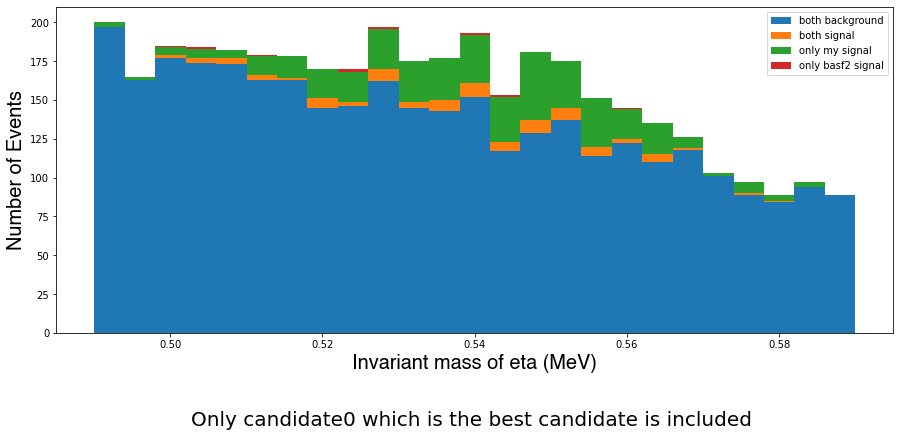

In [71]:
#### charged B
# InvM of eta
eta_InvM_bothsig0 = tree_p.loc['cut1'].loc['signal'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
eta_InvM_bothsig1 = tree_p.loc['cut1'].loc['signal'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
eta_InvM_bothsig = pd.concat([eta_InvM_bothsig0, eta_InvM_bothsig1])

eta_InvM_mysig0 = tree_p.loc['cut1'].loc['signal'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
eta_InvM_mysig1 = tree_p.loc['cut1'].loc['signal'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
eta_InvM_mysig = pd.concat([eta_InvM_mysig0, eta_InvM_mysig1])

eta_InvM_bothbkg0 = tree_p.loc['cut1'].loc['background'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
eta_InvM_bothbkg1 = tree_p.loc['cut1'].loc['background'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
eta_InvM_bothbkg = pd.concat([eta_InvM_bothbkg0, eta_InvM_bothbkg1])

eta_InvM_basf2sig0 = tree_p.loc['cut1'].loc['background'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
eta_InvM_basf2sig1 = tree_p.loc['cut1'].loc['background'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
eta_InvM_basf2sig = pd.concat([eta_InvM_basf2sig0, eta_InvM_basf2sig1])

plt.figure(figsize=(15,6))
plt.hist([eta_InvM_bothbkg, eta_InvM_bothsig, eta_InvM_mysig, eta_InvM_basf2sig], label=['both background', 'both signal', 'only my signal', 'only basf2 signal'], bins=25, histtype='barstacked')
plt.xlabel('Invariant mass of eta (MeV)', fontdict=form_label)
plt.ylabel('Number of Events', fontdict=form_label)

plt.text(0.25, -0.09, textstr0, fontsize=20, transform=plt.gcf().transFigure)

plt.legend()
# len(eta_InvM_mysig0)

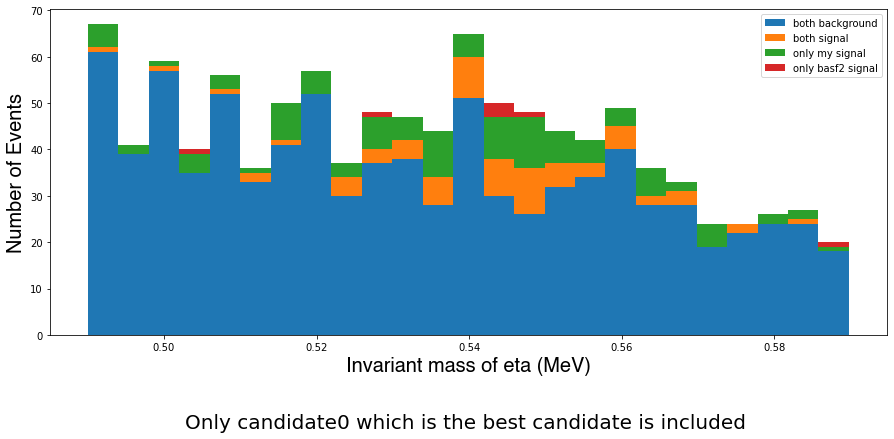

In [74]:
#### mixed B
# InvM of eta
eta_InvM_bothsig0 = tree0.loc['cut1'].loc['signal'].query('isSignal==1 & abs(B0_decayModeID-1450)<60')['pi4_B0_InvM']
eta_InvM_bothsig1 = tree0.loc['cut1'].loc['signal'].query('isSignal==1 & abs(B1_decayModeID-1450)<60')['pi4_B1_InvM']
eta_InvM_bothsig = pd.concat([eta_InvM_bothsig0, eta_InvM_bothsig1])

eta_InvM_mysig0 = tree0.loc['cut1'].loc['signal'].query('isSignal!=1 & abs(B0_decayModeID-1450)<60')['pi4_B0_InvM']
eta_InvM_mysig1 = tree0.loc['cut1'].loc['signal'].query('isSignal!=1 & abs(B1_decayModeID-1450)<60')['pi4_B1_InvM']
eta_InvM_mysig = pd.concat([eta_InvM_mysig0, eta_InvM_mysig1])

eta_InvM_bothbkg0 = tree0.loc['cut1'].loc['background'].query('isSignal!=1 & abs(B0_decayModeID-1450)<60')['pi4_B0_InvM']
eta_InvM_bothbkg1 = tree0.loc['cut1'].loc['background'].query('isSignal!=1 & abs(B1_decayModeID-1450)<60')['pi4_B1_InvM']
eta_InvM_bothbkg = pd.concat([eta_InvM_bothbkg0, eta_InvM_bothbkg1])

eta_InvM_basf2sig0 = tree0.loc['cut1'].loc['background'].query('isSignal==1 & abs(B0_decayModeID-1450)<60')['pi4_B0_InvM']
eta_InvM_basf2sig1 = tree0.loc['cut1'].loc['background'].query('isSignal==1 & abs(B1_decayModeID-1450)<60')['pi4_B1_InvM']
eta_InvM_basf2sig = pd.concat([eta_InvM_basf2sig0, eta_InvM_basf2sig1])

plt.figure(figsize=(15,6))
plt.hist([eta_InvM_bothbkg, eta_InvM_bothsig, eta_InvM_mysig, eta_InvM_basf2sig], label=['both background', 'both signal', 'only my signal', 'only basf2 signal'], bins=25, histtype='barstacked')
plt.xlabel('Invariant mass of eta (MeV)', fontdict=form_label)
plt.ylabel('Number of Events', fontdict=form_label)

plt.text(0.25, -0.09, textstr0, fontsize=20, transform=plt.gcf().transFigure)

plt.legend()
# len(eta_InvM_mysig0)

#### Why do we get some enteries where my signal is background and basf2 signal is signal (the red plot)

In [72]:
tree_p.loc['cut1'].loc['background'].query('isSignal==1')

,__experiment__,__run__,__event__,__production__,__candidate__,__ncandidates__,__weight__,Ecms,aBminusMode,aBplusMode,aB0Mode,aBbar0Mode,aDstminusMode,aDstplusMode,aDminusMode,aDplusMode,aD0Mode,aDbar0Mode,ECM,pCM,InvM,cosThCM,phiCM,PDG,nROE_Ch,nROE_ECL,nROE_KL,nROE_gam,Q_ROE,M_ROE,Eextra_ROE,R2,cosTBTO,M_roepi0,pCM_roepi0,phiCM_roepi0,cosThCM_roepi0,ECM_roegam,phiCM_roegam,cosThCM_roegam,pCM_roepi,phiCM_roepi,cosThCM_roepi,q_roepi,isSignal,Y4Sprod,Y4Sproduct,Y4SScore,Y4SScore4,decayModeID,cosBY0,cosBY1,cosDel,cosDelRange,B0_ECM,B0_pCM,B0_InvM,B0_cosThCM,B0_phiCM,B0_PDG,B0_BchiProb,B0_BflightDistance,B0_BflightDistanceErr,B0_B_dr,B0_B_dz,B0_B_x,B0_B_y,B0_B_z,B0_B_x_uncertainty,B0_B_y_uncertainty,B0_B_z_uncertainty,B0_isSignal,B0_mcErrors,B0_mcPDG,B0_genMotherID_0,B0_genMotherPDG_0,B0_genMotherPDG_1,B0_isSignalAcceptMissing,B0_decayModeID,B0_cosBY,B0_Pi0orEtaScore,B1_ECM,B1_pCM,B1_InvM,B1_cosThCM,B1_phiCM,B1_PDG,B1_BchiProb,B1_BflightDistance,B1_BflightDistanceErr,B1_B_dr,B1_B_dz,B1_B_x,B1_B_y,B1_B_z,B1_B_x_uncertainty,B1_B_y_uncertainty,B1_B_z_uncertainty,B1_isSignal,B1_mcErrors,B1_mcPDG,B1_genMotherID_0,B1_genMotherPDG_0,B1_genMotherPDG_1,B1_isSignalAcceptMissing,B1_decayModeID,B1_cosBY,B1_Pi0orEtaScore,e_B0_ECM,e_B0_pCM,e_B0_InvM,e_B0_cosThCM,e_B0_phiCM,e_B0_PDG,e_B0_isSignal,e_B0_mcErrors,e_B0_mcPDG,e_B0_genMotherID_0,e_B0_genMotherPDG_0,e_B0_genMotherPDG_1,e_B0_isSignalAcceptMissing,e_B0_electronID,e_B0_muonID,e_B1_ECM,e_B1_pCM,e_B1_InvM,e_B1_cosThCM,e_B1_phiCM,e_B1_PDG,e_B1_isSignal,e_B1_mcErrors,e_B1_mcPDG,e_B1_genMotherID_0,e_B1_genMotherPDG_0,e_B1_genMotherPDG_1,e_B1_isSignalAcceptMissing,e_B1_electronID,e_B1_muonID,D_B0_ECM,D_B0_pCM,D_B0_InvM,D_B0_cosThCM,D_B0_phiCM,D_B0_PDG,D_B0_BFInvM,D_B0_DchiProb,D_B0_DflightDistance,D_B0_DflightDistanceErr,D_B0_mcECM,D_B0_mcPCM,D_B0_mcThetaCM,D_B0_mcPhiCM,D_B0_isSignal,D_B0_mcErrors,D_B0_mcPDG,D_B0_genMotherID_0,D_B0_genMotherPDG_0,D_B0_genMotherPDG_1,D_B0_genMotherPDG_2,D_B0_isSignalAcceptMissing,D_B0_decayModeID,D_B1_ECM,D_B1_pCM,D_B1_InvM,D_B1_cosThCM,D_B1_phiCM,D_B1_PDG,D_B1_BFInvM,D_B1_DchiProb,D_B1_DflightDistance,D_B1_DflightDistanceErr,D_B1_mcECM,D_B1_mcPCM,D_B1_mcThetaCM,D_B1_mcPhiCM,D_B1_isSignal,D_B1_mcErrors,D_B1_mcPDG,D_B1_genMotherID_0,D_B1_genMotherPDG_0,D_B1_genMotherPDG_1,D_B1_genMotherPDG_2,D_B1_isSignalAcceptMissing,D_B1_decayModeID,D_0_B0_ECM,D_0_B0_pCM,D_0_B0_InvM,D_0_B0_cosThCM,D_0_B0_phiCM,D_0_B0_PDG,D_0_B0_BFInvM,D_0_B0_DchiProb,D_0_B0_DflightDistance,D_0_B0_DflightDistanceErr,D_0_B0_mcECM,D_0_B0_mcPCM,D_0_B0_mcThetaCM,D_0_B0_mcPhiCM,D_0_B0_isSignal,D_0_B0_mcErrors,D_0_B0_mcPDG,D_0_B0_genMotherID_0,D_0_B0_genMotherPDG_0,D_0_B0_genMotherPDG_1,D_0_B0_genMotherPDG_2,D_0_B0_isSignalAcceptMissing,D_0_B0_decayModeID,D_0_0_B0_ECM,D_0_0_B0_pCM,D_0_0_B0_InvM,D_0_0_B0_cosThCM,D_0_0_B0_phiCM,D_0_0_B0_PDG,D_0_0_B0_mcECM,D_0_0_B0_mcPCM,D_0_0_B0_mcThetaCM,D_0_0_B0_mcPhiCM,D_0_0_B0_isSignal,D_0_0_B0_mcErrors,D_0_0_B0_mcPDG,D_0_0_B0_genMotherID_0,D_0_0_B0_genMotherPDG_0,D_0_0_B0_genMotherPDG_1,D_0_0_B0_genMotherPDG_2,D_0_0_B0_isSignalAcceptMissing,D_0_0_0_B0_ECM,D_0_0_0_B0_pCM,D_0_0_0_B0_InvM,D_0_0_0_B0_cosThCM,D_0_0_0_B0_phiCM,D_0_0_0_B0_PDG,D_0_0_0_B0_mcECM,D_0_0_0_B0_mcPCM,D_0_0_0_B0_mcThetaCM,D_0_0_0_B0_mcPhiCM,D_0_0_0_B0_isSignal,D_0_0_0_B0_mcErrors,D_0_0_0_B0_mcPDG,D_0_0_0_B0_genMotherID_0,D_0_0_0_B0_genMotherPDG_0,D_0_0_0_B0_genMotherPDG_1,D_0_0_0_B0_genMotherPDG_2,D_0_0_0_B0_isSignalAcceptMissing,D_0_0_1_B0_ECM,D_0_0_1_B0_pCM,D_0_0_1_B0_InvM,D_0_0_1_B0_cosThCM,D_0_0_1_B0_phiCM,D_0_0_1_B0_PDG,D_0_0_1_B0_mcECM,D_0_0_1_B0_mcPCM,D_0_0_1_B0_mcThetaCM,D_0_0_1_B0_mcPhiCM,D_0_0_1_B0_isSignal,D_0_0_1_B0_mcErrors,D_0_0_1_B0_mcPDG,D_0_0_1_B0_genMotherID_0,D_0_0_1_B0_genMotherPDG_0,D_0_0_1_B0_genMotherPDG_1,D_0_0_1_B0_genMotherPDG_2,D_0_0_1_B0_isSignalAcceptMissing,D_0_1_B0_ECM,D_0_1_B0_pCM,D_0_1_B0_InvM,D_0_1_B0_cosThCM,D_0_1_B0_phiCM,D_0_1_B0_PDG,D_0_1_B0_mcECM,D_0_1_B0_mcPCM,D_0_1_B0_mcThetaCM,D_0_1_B0_mcPhiCM,D_0_1_B0_isSignal,D_0_1_B0_mcErrors,D_0_1_B0_mcPDG,D_0_1_B0_gen

In [75]:
tree0.loc['cut1'].loc['background'].query('isSignal==1')

,__experiment__,__run__,__event__,__production__,__candidate__,__ncandidates__,__weight__,Ecms,aBminusMode,aBplusMode,aB0Mode,aBbar0Mode,aDstminusMode,aDstplusMode,aDminusMode,aDplusMode,aD0Mode,aDbar0Mode,ECM,pCM,InvM,cosThCM,phiCM,PDG,nROE_Ch,nROE_ECL,nROE_KL,nROE_gam,Q_ROE,M_ROE,Eextra_ROE,R2,cosTBTO,M_roepi0,pCM_roepi0,phiCM_roepi0,cosThCM_roepi0,ECM_roegam,phiCM_roegam,cosThCM_roegam,pCM_roepi,phiCM_roepi,cosThCM_roepi,q_roepi,isSignal,Y4Sprod,Y4Sproduct,Y4SScore,Y4SScore4,decayModeID,cosBY0,cosBY1,cosDel,cosDelRange,B0_ECM,B0_pCM,B0_InvM,B0_cosThCM,B0_phiCM,B0_PDG,B0_BchiProb,B0_BflightDistance,B0_BflightDistanceErr,B0_B_dr,B0_B_dz,B0_B_x,B0_B_y,B0_B_z,B0_B_x_uncertainty,B0_B_y_uncertainty,B0_B_z_uncertainty,B0_isSignal,B0_mcErrors,B0_mcPDG,B0_genMotherID_0,B0_genMotherPDG_0,B0_genMotherPDG_1,B0_isSignalAcceptMissing,B0_decayModeID,B0_cosBY,B0_Pi0orEtaScore,B1_ECM,B1_pCM,B1_InvM,B1_cosThCM,B1_phiCM,B1_PDG,B1_BchiProb,B1_BflightDistance,B1_BflightDistanceErr,B1_B_dr,B1_B_dz,B1_B_x,B1_B_y,B1_B_z,B1_B_x_uncertainty,B1_B_y_uncertainty,B1_B_z_uncertainty,B1_isSignal,B1_mcErrors,B1_mcPDG,B1_genMotherID_0,B1_genMotherPDG_0,B1_genMotherPDG_1,B1_isSignalAcceptMissing,B1_decayModeID,B1_cosBY,B1_Pi0orEtaScore,e_B0_ECM,e_B0_pCM,e_B0_InvM,e_B0_cosThCM,e_B0_phiCM,e_B0_PDG,e_B0_isSignal,e_B0_mcErrors,e_B0_mcPDG,e_B0_genMotherID_0,e_B0_genMotherPDG_0,e_B0_genMotherPDG_1,e_B0_isSignalAcceptMissing,e_B0_electronID,e_B0_muonID,e_B1_ECM,e_B1_pCM,e_B1_InvM,e_B1_cosThCM,e_B1_phiCM,e_B1_PDG,e_B1_isSignal,e_B1_mcErrors,e_B1_mcPDG,e_B1_genMotherID_0,e_B1_genMotherPDG_0,e_B1_genMotherPDG_1,e_B1_isSignalAcceptMissing,e_B1_electronID,e_B1_muonID,D_B0_ECM,D_B0_pCM,D_B0_InvM,D_B0_cosThCM,D_B0_phiCM,D_B0_PDG,D_B0_BFInvM,D_B0_DchiProb,D_B0_DflightDistance,D_B0_DflightDistanceErr,D_B0_mcECM,D_B0_mcPCM,D_B0_mcThetaCM,D_B0_mcPhiCM,D_B0_isSignal,D_B0_mcErrors,D_B0_mcPDG,D_B0_genMotherID_0,D_B0_genMotherPDG_0,D_B0_genMotherPDG_1,D_B0_genMotherPDG_2,D_B0_isSignalAcceptMissing,D_B0_decayModeID,D_B1_ECM,D_B1_pCM,D_B1_InvM,D_B1_cosThCM,D_B1_phiCM,D_B1_PDG,D_B1_BFInvM,D_B1_DchiProb,D_B1_DflightDistance,D_B1_DflightDistanceErr,D_B1_mcECM,D_B1_mcPCM,D_B1_mcThetaCM,D_B1_mcPhiCM,D_B1_isSignal,D_B1_mcErrors,D_B1_mcPDG,D_B1_genMotherID_0,D_B1_genMotherPDG_0,D_B1_genMotherPDG_1,D_B1_genMotherPDG_2,D_B1_isSignalAcceptMissing,D_B1_decayModeID,D_0_B0_ECM,D_0_B0_pCM,D_0_B0_InvM,D_0_B0_cosThCM,D_0_B0_phiCM,D_0_B0_PDG,D_0_B0_BFInvM,D_0_B0_DchiProb,D_0_B0_DflightDistance,D_0_B0_DflightDistanceErr,D_0_B0_mcECM,D_0_B0_mcPCM,D_0_B0_mcThetaCM,D_0_B0_mcPhiCM,D_0_B0_isSignal,D_0_B0_mcErrors,D_0_B0_mcPDG,D_0_B0_genMotherID_0,D_0_B0_genMotherPDG_0,D_0_B0_genMotherPDG_1,D_0_B0_genMotherPDG_2,D_0_B0_isSignalAcceptMissing,D_0_B0_decayModeID,D_0_0_B0_ECM,D_0_0_B0_pCM,D_0_0_B0_InvM,D_0_0_B0_cosThCM,D_0_0_B0_phiCM,D_0_0_B0_PDG,D_0_0_B0_mcECM,D_0_0_B0_mcPCM,D_0_0_B0_mcThetaCM,D_0_0_B0_mcPhiCM,D_0_0_B0_isSignal,D_0_0_B0_mcErrors,D_0_0_B0_mcPDG,D_0_0_B0_genMotherID_0,D_0_0_B0_genMotherPDG_0,D_0_0_B0_genMotherPDG_1,D_0_0_B0_genMotherPDG_2,D_0_0_B0_isSignalAcceptMissing,D_0_0_0_B0_ECM,D_0_0_0_B0_pCM,D_0_0_0_B0_InvM,D_0_0_0_B0_cosThCM,D_0_0_0_B0_phiCM,D_0_0_0_B0_PDG,D_0_0_0_B0_mcECM,D_0_0_0_B0_mcPCM,D_0_0_0_B0_mcThetaCM,D_0_0_0_B0_mcPhiCM,D_0_0_0_B0_isSignal,D_0_0_0_B0_mcErrors,D_0_0_0_B0_mcPDG,D_0_0_0_B0_genMotherID_0,D_0_0_0_B0_genMotherPDG_0,D_0_0_0_B0_genMotherPDG_1,D_0_0_0_B0_genMotherPDG_2,D_0_0_0_B0_isSignalAcceptMissing,D_0_0_1_B0_ECM,D_0_0_1_B0_pCM,D_0_0_1_B0_InvM,D_0_0_1_B0_cosThCM,D_0_0_1_B0_phiCM,D_0_0_1_B0_PDG,D_0_0_1_B0_mcECM,D_0_0_1_B0_mcPCM,D_0_0_1_B0_mcThetaCM,D_0_0_1_B0_mcPhiCM,D_0_0_1_B0_isSignal,D_0_0_1_B0_mcErrors,D_0_0_1_B0_mcPDG,D_0_0_1_B0_genMotherID_0,D_0_0_1_B0_genMotherPDG_0,D_0_0_1_B0_genMotherPDG_1,D_0_0_1_B0_genMotherPDG_2,D_0_0_1_B0_isSignalAcceptMissing,D_0_1_B0_ECM,D_0_1_B0_pCM,D_0_1_B0_InvM,D_0_1_B0_cosThCM,D_0_1_B0_phiCM,D_0_1_B0_PDG,D_0_1_B0_mcECM,D_0_1_B0_mcPCM,D_0_1_B0_mcThetaCM,D_0_1_B0_mcPhiCM,D_0_1_B0_isSignal,D_0_1_B0_mcErrors,D_0_1_B0_mcPDG,D_0_1_B0_gen

<IPython.core.display.Latex object>

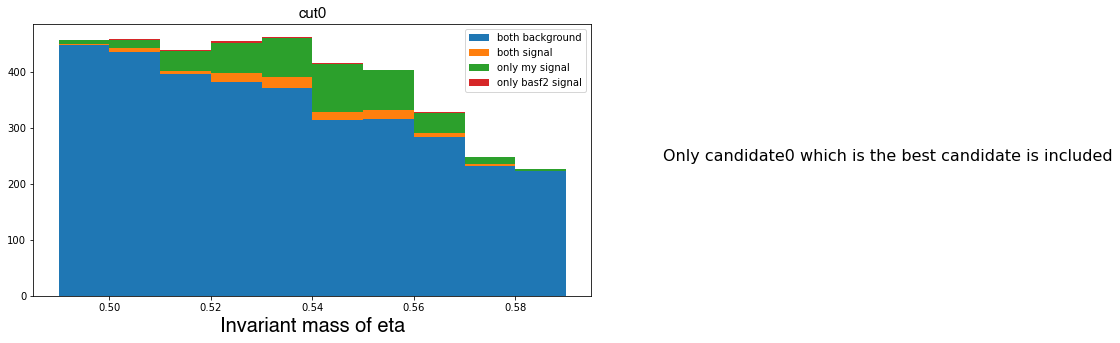

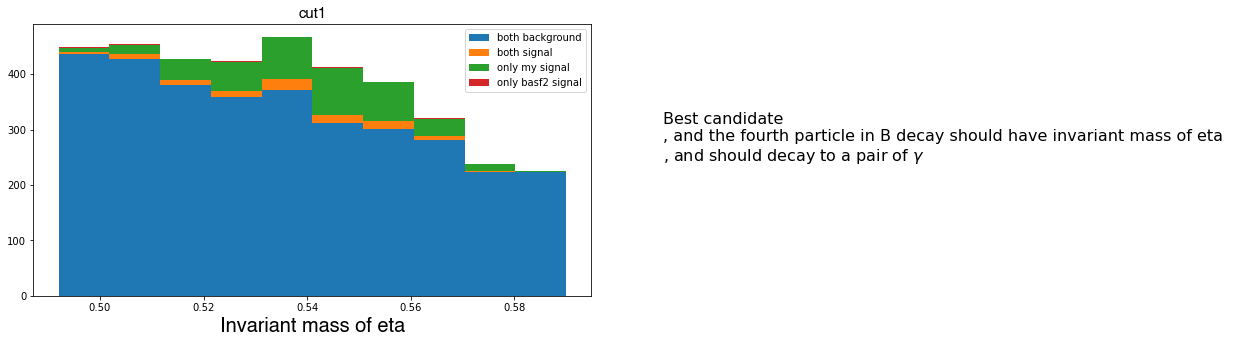

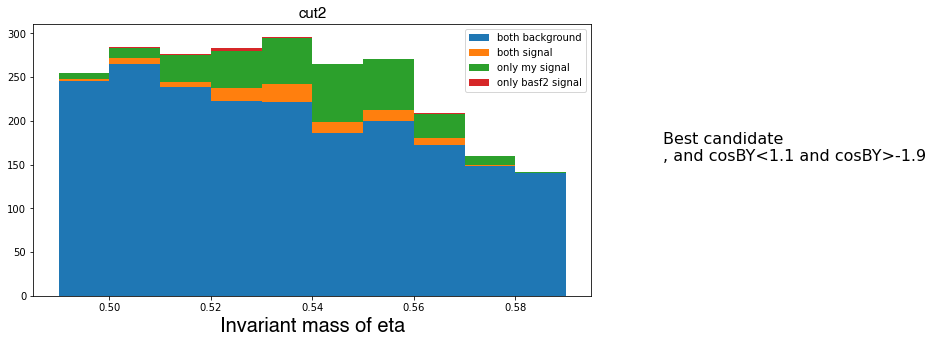

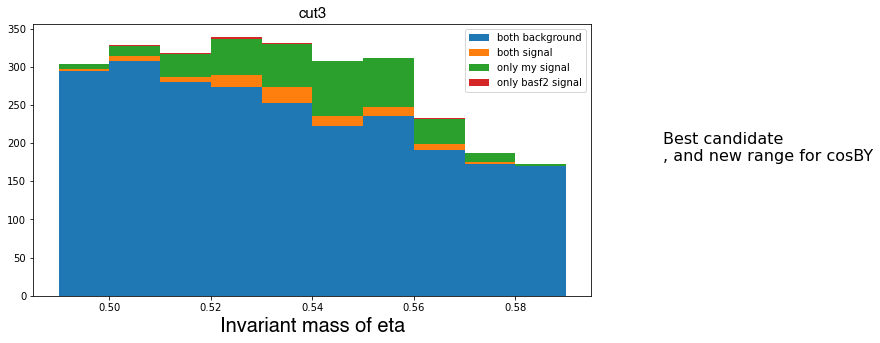

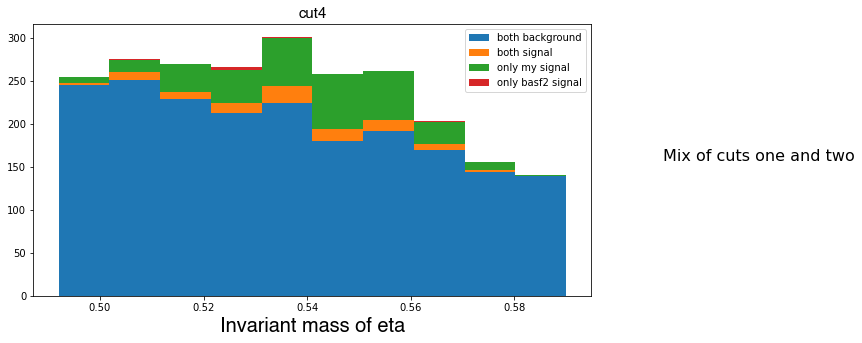

In [29]:
#### charged B
# InvM of eta
# All cuts
display(Latex(textstr))
for i in range(len(samplesBp_cuts)):
    eta_InvM_bothsig0 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
    eta_InvM_bothsig1 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
    eta_InvM_bothsig = pd.concat([eta_InvM_bothsig0, eta_InvM_bothsig1])

    eta_InvM_mysig0 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
    eta_InvM_mysig1 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
    eta_InvM_mysig = pd.concat([eta_InvM_mysig0, eta_InvM_mysig1])

    eta_InvM_bothbkg0 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
    eta_InvM_bothbkg1 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
    eta_InvM_bothbkg = pd.concat([eta_InvM_bothbkg0, eta_InvM_bothbkg1])
    
    eta_InvM_basf2sig0 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
    eta_InvM_basf2sig1 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
    eta_InvM_basf2sig = pd.concat([eta_InvM_basf2sig0, eta_InvM_basf2sig1])

    
    plt.figure(figsize=(10,5))

    plt.hist([eta_InvM_bothbkg, eta_InvM_bothsig, eta_InvM_mysig, eta_InvM_basf2sig], label=['both background', 'both signal', 'only my signal', 'only basf2 signal'], histtype='barstacked')
    plt.xlabel('Invariant mass of eta', fontdict=form_label)
    plt.title(f'cut{i}', fontdict=form_title)
    plt.text(1, 0.5, text[i], fontsize=16, transform=plt.gcf().transFigure)
    
    plt.legend()

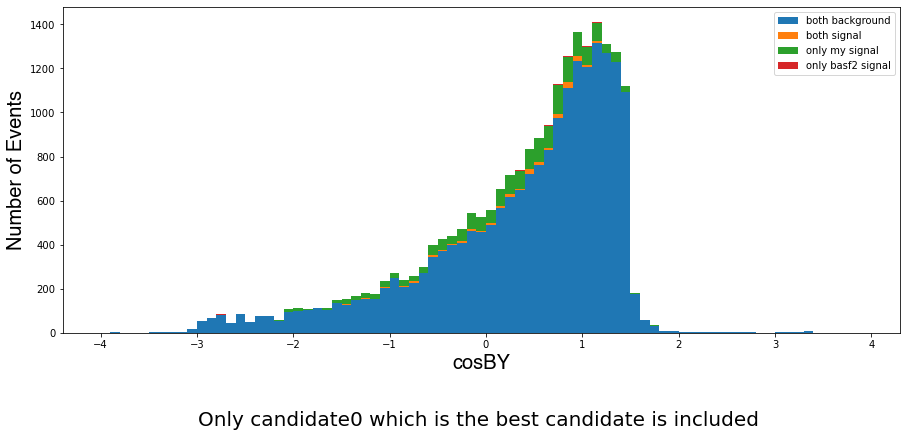

In [68]:
# BpBm
# cosBY
eta_InvM_bothsig0 = tree_p.loc['cut0'].loc['signal'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['cosBY0']
eta_InvM_bothsig1 = tree_p.loc['cut0'].loc['signal'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['cosBY1']
eta_InvM_bothsig = pd.concat([eta_InvM_bothsig0, eta_InvM_bothsig1])

eta_InvM_mysig0 = tree_p.loc['cut0'].loc['signal'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['cosBY0']
eta_InvM_mysig1 = tree_p.loc['cut0'].loc['signal'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['cosBY1']
eta_InvM_mysig = pd.concat([eta_InvM_mysig0, eta_InvM_mysig1])

eta_InvM_bothbkg0 = tree_p.loc['cut0'].loc['background'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['cosBY0']
eta_InvM_bothbkg1 = tree_p.loc['cut0'].loc['background'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['cosBY1']
eta_InvM_bothbkg = pd.concat([eta_InvM_bothbkg0, eta_InvM_bothbkg1])

eta_InvM_basf2sig0 = tree_p.loc['cut0'].loc['background'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['cosBY0']
eta_InvM_basf2sig1 = tree_p.loc['cut0'].loc['background'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['cosBY1']
eta_InvM_basf2sig = pd.concat([eta_InvM_basf2sig0, eta_InvM_basf2sig1])

plt.figure(figsize=(15,6))
plt.hist([eta_InvM_bothbkg, eta_InvM_bothsig, eta_InvM_mysig, eta_InvM_basf2sig], label=['both background', 'both signal', 'only my signal', 'only basf2 signal'], histtype='barstacked', bins=np.arange(-4,4,0.1))
plt.xlabel('cosBY', fontdict=form_label)
plt.ylabel('Number of Events', fontdict=form_label)

plt.text(0.25, -0.09, textstr0, fontsize=20, transform=plt.gcf().transFigure)

plt.legend()
# len(eta_InvM_mysig0)

<IPython.core.display.Latex object>

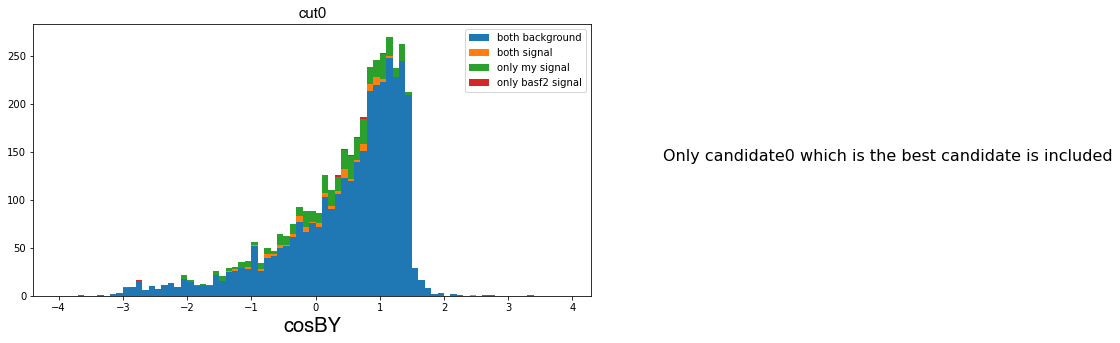

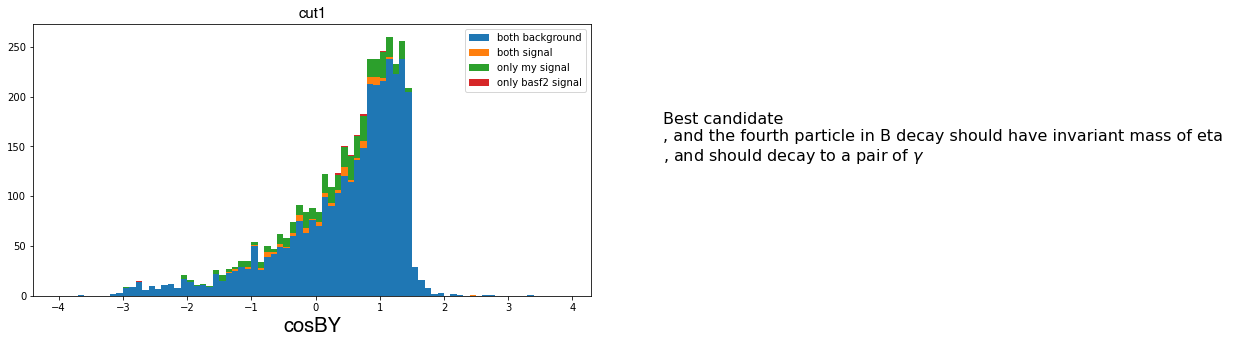

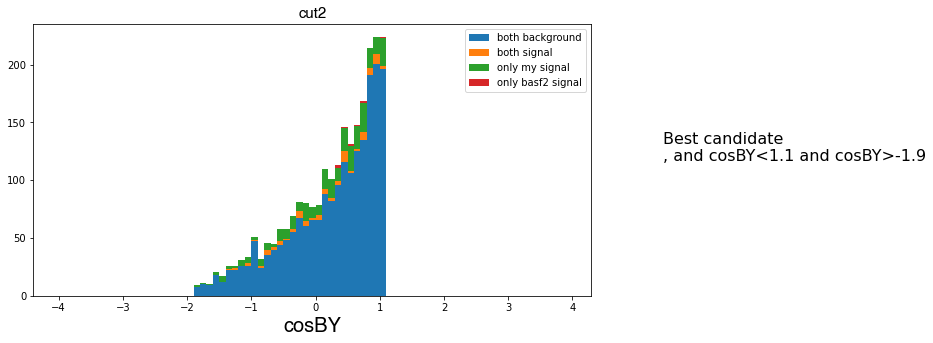

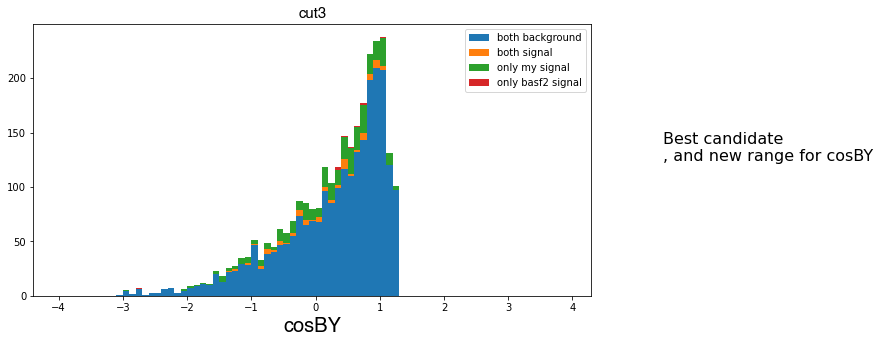

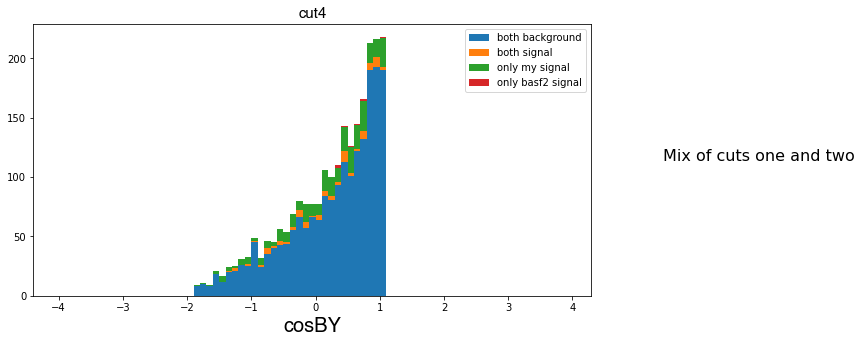

In [31]:
#### charged B
# InvM of eta
# All cuts
display(Latex(textstr))
for i in range(len(samplesBp_cuts)):
    eta_InvM_bothsig0 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['cosBY0']
    eta_InvM_bothsig1 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['cosBY1']
    eta_InvM_bothsig = pd.concat([eta_InvM_bothsig0, eta_InvM_bothsig1])

    eta_InvM_mysig0 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['cosBY0']
    eta_InvM_mysig1 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['cosBY1']
    eta_InvM_mysig = pd.concat([eta_InvM_mysig0, eta_InvM_mysig1])

    eta_InvM_bothbkg0 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['cosBY0']
    eta_InvM_bothbkg1 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['cosBY1']
    eta_InvM_bothbkg = pd.concat([eta_InvM_bothbkg0, eta_InvM_bothbkg1])
    
    eta_InvM_basf2sig0 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['cosBY0']
    eta_InvM_basf2sig1 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['cosBY1']
    eta_InvM_basf2sig = pd.concat([eta_InvM_basf2sig0, eta_InvM_basf2sig1])

    
    plt.figure(figsize=(10,5))

    plt.hist([eta_InvM_bothbkg, eta_InvM_bothsig, eta_InvM_mysig, eta_InvM_basf2sig], label=['both background', 'both signal', 'only my signal', 'only basf2 signal'], histtype='barstacked', bins=np.arange(-4,4,0.1))
    plt.xlabel('cosBY', fontdict=form_label)
    plt.title(f'cut{i}', fontdict=form_title)
    plt.text(1, 0.5, text[i], fontsize=16, transform=plt.gcf().transFigure)
    
    plt.legend()

### We're getting better results without 'y4scuts': let's check the variable 'cosBY'

In [76]:
etamodes = [1019,1020,1039,1040]
df1 = df_charged[(df_charged['aBplusMode']%10000).isin(etamodes)]
print(len(df1['aBplusMode']))
df2 = df_charged.loc[df_charged.apply(lambda x: ( ((x.aBplusMode%10000 in etamodes) or (abs(x.aBminusMode)%10000 in etamodes)) and ((x.pi4_B0_isSignal==1) or (x.pi4_B1_isSignal==1)) ), axis=1)]
len(df2['aBplusMode'])

1777


2069

In [77]:
len(tree_p.loc['cut0'].loc['signal'].query('abs(B0_decayModeID-250)<160')['B0_decayModeID'])
len(tree_p.loc['cut0'].loc['signal'].query('B0_decayModeID<500 or B1_decayModeID<500')['B0_decayModeID'])

2069

In [78]:
tree_p.loc['cut0'].query('abs(B0_decayModeID-1650)<60')['B0_decayModeID']

signal        1700.0
signal        1700.0
signal        1700.0
signal        1701.0
signal        1701.0
               ...  
background    1700.0
background    1700.0
background    1700.0
background    1700.0
background    1600.0
Name: B0_decayModeID, Length: 10728, dtype: float64

In [81]:
print(form_label)

{'family': 'helvetica', 'color': 'black', 'size': 20}


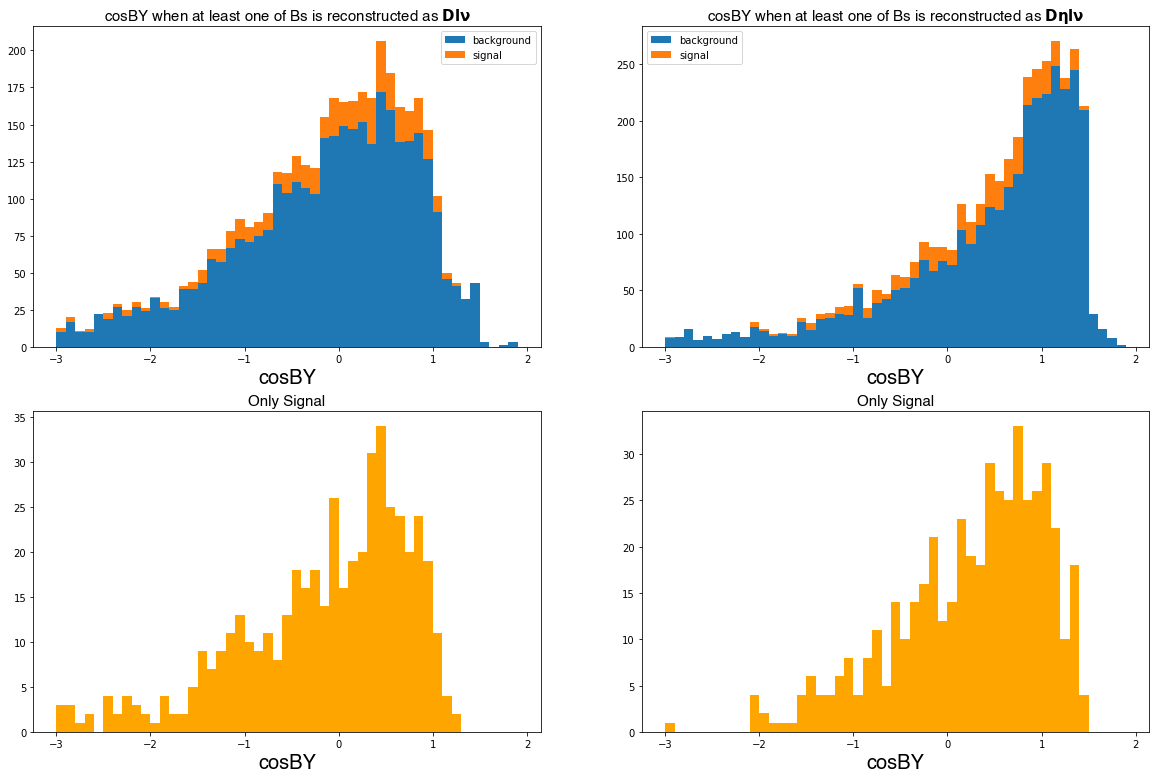

In [101]:
# cosBY for Dlnu
cosBY0p_Dl_sig = tree_p.loc['cut1'].loc['signal'].query('B0_decayModeID<500')['cosBY0']
cosBY1p_Dl_sig = tree_p.loc['cut1'].loc['signal'].query('B1_decayModeID<500')['cosBY1']
cosBYp_Dl_sig = pd.concat([cosBY0p_Dl_sig,cosBY1p_Dl_sig])

cosBY0p_Dl_bkg = tree_p.loc['cut1'].loc['background'].query('B0_decayModeID<500')['cosBY0']
cosBY1p_Dl_bkg = tree_p.loc['cut1'].loc['background'].query('B1_decayModeID<500')['cosBY1']
cosBYp_Dl_bkg = pd.concat([cosBY0p_Dl_bkg, cosBY1p_Dl_bkg])

# cosBY for Detalnu
cosBY0p_Detal_sig = tree_p.loc['cut1'].loc['signal'].query('abs(B0_decayModeID-1650)<60')['cosBY0']
cosBY1p_Detal_sig = tree_p.loc['cut1'].loc['signal'].query('abs(B1_decayModeID-1650)<60')['cosBY1']
cosBYp_Detal_sig = pd.concat([cosBY0p_Detal_sig,cosBY1p_Detal_sig])

cosBY0p_Detal_bkg = tree_p.loc['cut1'].loc['background'].query('abs(B0_decayModeID-1650)<60')['cosBY0']
cosBY1p_Detal_bkg = tree_p.loc['cut1'].loc['background'].query('abs(B1_decayModeID-1650)<60')['cosBY1']
cosBYp_Detal_bkg = pd.concat([cosBY0p_Detal_bkg, cosBY1p_Detal_bkg])


# plt.figure(figsize=(15, 4))
# ax_log = plt.subplot(121)
# count, bins, _ = ax_log.hist([cosBY0p_bkg, cosBY0p_sig], label=['background', 'signal'], bins=50)
# ax_log.set_yscale('log')
# print(count[0])

plt.figure(figsize=(20, 10))
ax_linear = plt.subplot(221)
count_cosBYp_Dl, binedges_cosBYp_Dl, _ = ax_linear.hist([cosBYp_Dl_bkg, cosBYp_Dl_sig], label=['background', 'signal'], histtype='barstacked', bins=np.arange(-3,2,0.1))
plt.xlabel('cosBY', fontdict=form_label)
plt.title(r'cosBY when at least one of Bs is reconstructed as $\bf Dl\nu$', fontdict=form_title)
plt.legend()

ax_linear = plt.subplot(222)
count_cosBYp_Detal, binedges_cosBYp_Detal, _ = ax_linear.hist([cosBYp_Detal_bkg, cosBYp_Detal_sig], label=['background', 'signal'], histtype='barstacked', bins=np.arange(-3,2,0.1))
plt.xlabel('cosBY', fontdict=form_label)
plt.title(r'cosBY when at least one of Bs is reconstructed as $\bf D\eta l\nu$', fontdict=form_title)
plt.legend()

plt.subplots_adjust(bottom=-0.1)

plt.subplot(223)
plt.xlabel('cosBY', fontdict=form_label)
plt.title(r'Only Signal', fontdict=form_title)
plt.hist(cosBYp_Dl_sig,bins=np.arange(-3,2,0.1), color='orange')

plt.subplot(224)
plt.xlabel('cosBY', fontdict=form_label)
plt.title(r'Only Signal', fontdict=form_title)
plt.hist(cosBYp_Detal_sig,bins=np.arange(-3,2,0.1), color='orange')

plt.show()

In [89]:
len(binedges_cosBYp_Dl)

50

In [90]:
print('bin count length', len(count_cosBYp_Dl[0]), 'bin edge length', len(binedges_cosBYp_Dl[:48]))

bin count length 49 bin edge length 48


#### The idea is to define a for loop to find the ratio of signal to background in different parts of the above histogram.

b


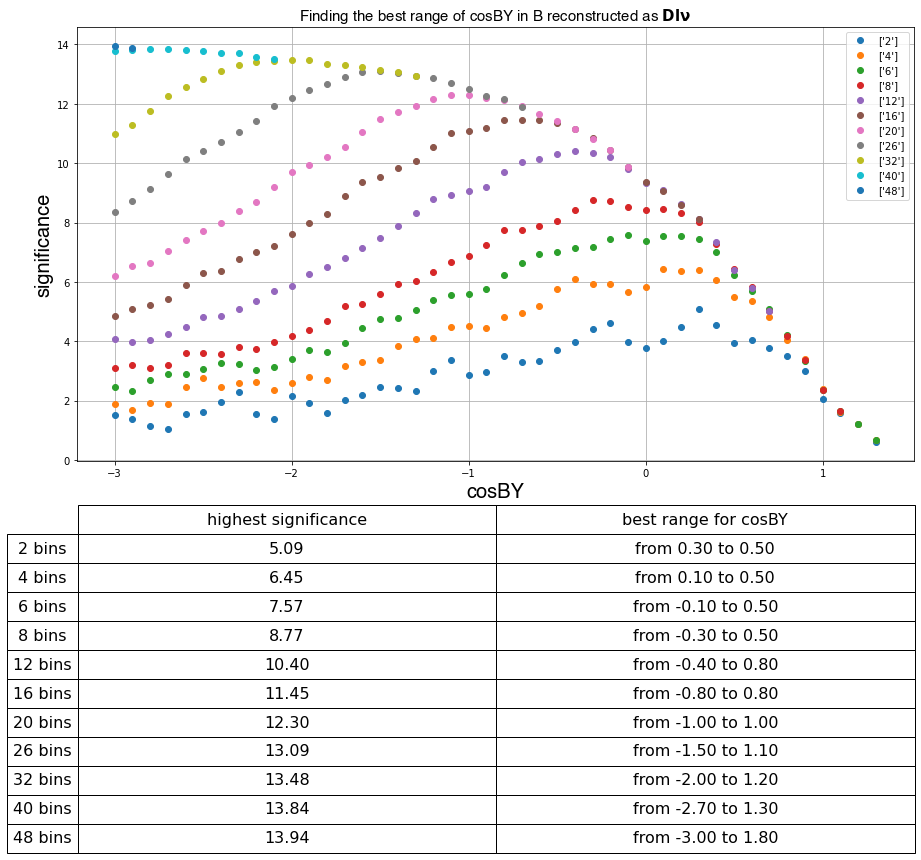

In [92]:
# window_list
window_cosBY=[2,4,6,8,12,16,20,26,32,40,48]
exec(open('functions.py').read())

# Dlnu
s_cosBYp_Dl, r_cosBYp_Dl, ranges_cosBYp_Dl= variable_best_range(window_cosBY, count_cosBYp_Dl, binedges_cosBYp_Dl)

plt.figure(figsize=(15, 8))
plot_variable_best_range('cosBY',window_cosBY, s_cosBYp_Dl, ranges_cosBYp_Dl, binedges_cosBYp_Dl)
plt.title('Finding the best range of cosBY in B reconstructed as ' +  r'$\bf Dl\nu$', fontdict=form_title)

plt.grid(True)
plt.show()

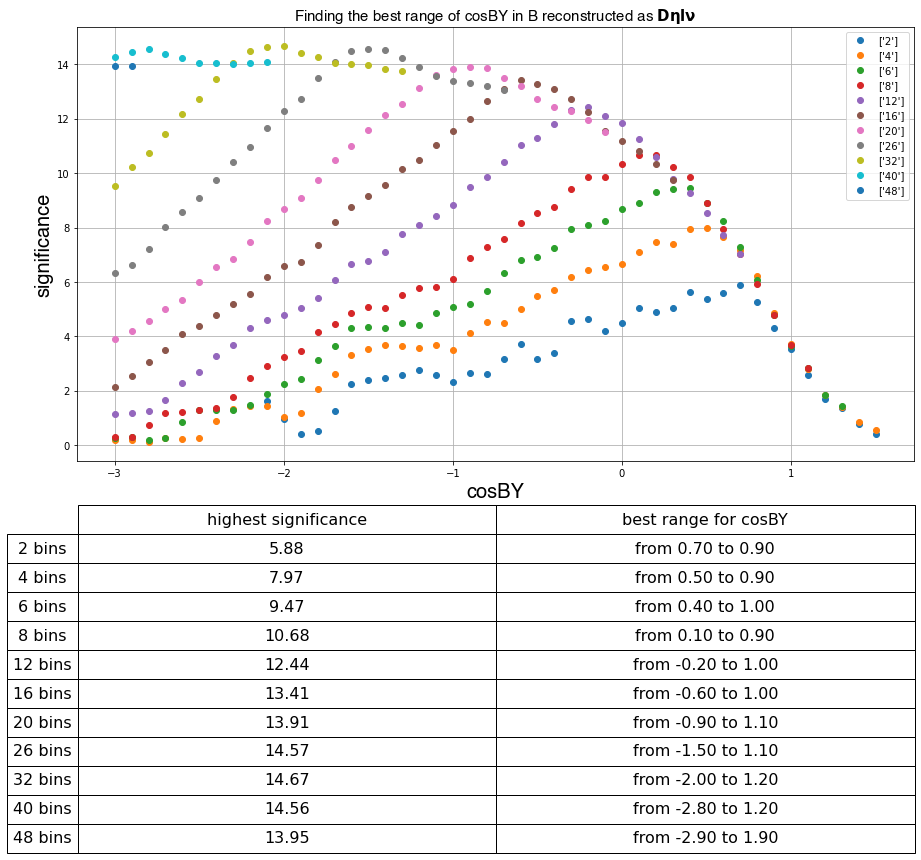

In [94]:
# Detalnu
s_cosBYp_Detal, r_cosBYp_Detal, ranges_cosBYp_Detal= variable_best_range(window_cosBY, count_cosBYp_Detal, binedges_cosBYp_Detal)

plt.figure(figsize=(15, 8))
plot_variable_best_range('cosBY',window_cosBY, s_cosBYp_Detal, ranges_cosBYp_Detal, binedges_cosBYp_Detal)
plt.title('Finding the best range of cosBY in B reconstructed as ' +  r'$\bf D\eta l\nu$', fontdict=form_title)


plt.grid(True)
plt.show()

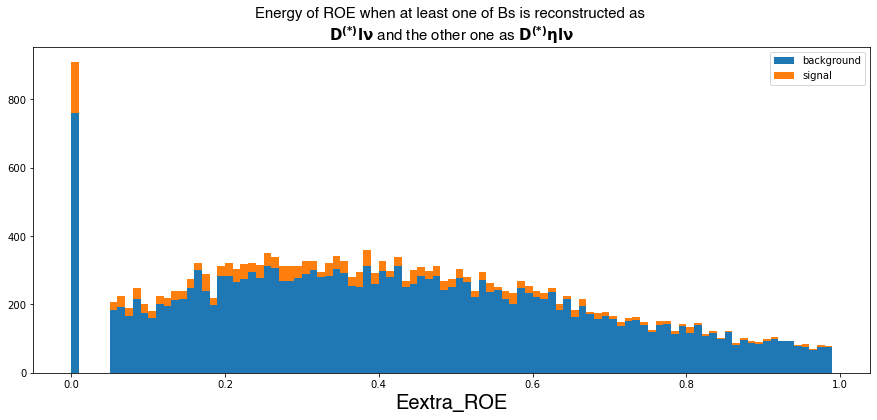

In [97]:
# Eextra_ROE
Eextra_ROEp_Dl_sig = tree_p.loc['cut0'].loc['signal']['Eextra_ROE']
Eextra_ROEp_Dl_bkg = tree_p.loc['cut0'].loc['background']['Eextra_ROE']

plt.figure(figsize=(15, 6))
count_Eextra_ROEp_Dl, binedges_Eextra_ROEp_Dl, _ = plt.hist([Eextra_ROEp_Dl_bkg, Eextra_ROEp_Dl_sig], label=['background', 'signal'], histtype='barstacked', bins=np.arange(0,1,0.01))
plt.xlabel('Eextra_ROE', fontdict=form_label)
plt.title('Energy of ROE when at least one of Bs is reconstructed as \n'+ r'$\bf D^{(*)}l\nu$ and the other one as $\bf D^{(*)}\eta l\nu$', fontdict=form_title)
plt.legend()

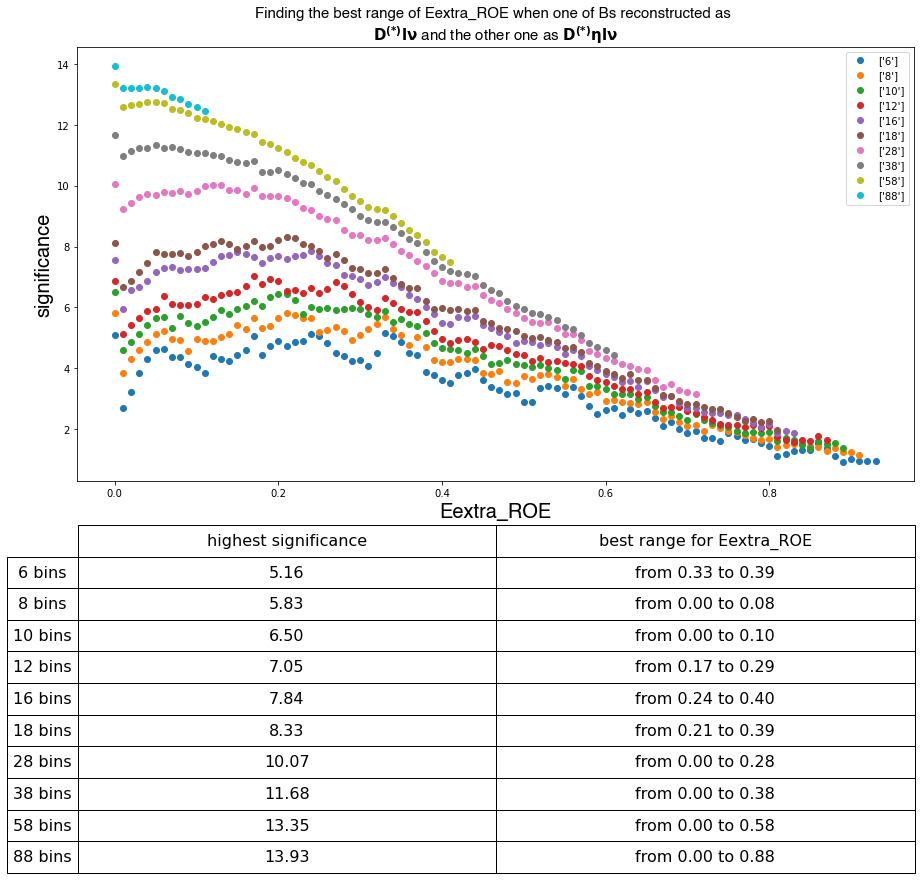

In [100]:
window_Eextra = [6, 8, 10, 12, 16, 18, 28, 38, 58, 88]
# Dlnu
s_Eextra_ROEp_Dl, r_Eextra_ROEp_Dl, ranges_Eextra_ROEp_Dl= variable_best_range(window_Eextra, count_Eextra_ROEp_Dl, binedges_Eextra_ROEp_Dl)

plt.figure(figsize=(15, 8))
plot_variable_best_range('Eextra_ROE',window_Eextra, s_Eextra_ROEp_Dl, ranges_Eextra_ROEp_Dl, binedges_Eextra_ROEp_Dl)
plt.title('Finding the best range of Eextra_ROE when one of Bs reconstructed as \n' +  r'$\bf D^{(*)}l\nu$ and the other one as $\bf D^{(*)}\eta l\nu$', fontdict=form_title)

plt.show()

$ $
$ $